In [104]:
import pandas as pd
import numpy as np

In [105]:
automobile_data = pd.read_csv('datasets/Automobile_data.csv', 
                              sep=r'\s*,\s*', 
                              engine='python')

In [106]:

automobile_data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [107]:
automobile_data = automobile_data.replace('?', np.nan)

In [108]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [109]:
automobile_data = automobile_data.dropna()

In [110]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [111]:
col = ['make', 'fuel-type', 'body-style', 'horsepower']
automobile_features = automobile_data[col]

In [112]:
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [113]:
automobile_target = automobile_data[['price']]

In [114]:
automobile_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [115]:
automobile_features['horsepower'].head()

3     102
4     115
6     110
8     140
10    101
Name: horsepower, dtype: object

In [116]:
pd.options.mode.chained_assignment = None

In [117]:
automobile_features['horsepower'] = \
     pd.to_numeric(automobile_features['horsepower'])

In [118]:
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [119]:
automobile_target['price'].describe()

count      159
unique     145
top       7609
freq         2
Name: price, dtype: object

In [120]:
automobile_target = automobile_target.astype(float)

In [121]:
automobile_target['price'].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [122]:
automobile_features = pd.get_dummies(automobile_features,
                                    columns = ['make','fuel-type', 'body-style'])

In [123]:
automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [124]:
 automobile_features.columns

Index(['horsepower', 'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge',
       'make_honda', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon'],
      dtype='object')

In [125]:
from sklearn import preprocessing

In [126]:
automobile_features[['horsepower']] = \
preprocessing.scale(automobile_features[['horsepower']])

In [127]:
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, x_test, Y_train, y_test = train_test_split(automobile_features,
                                                   automobile_target,
                                                   test_size = 0.2,
                                                   random_state=0)

In [130]:
import torch


In [131]:
dtype = torch.float

In [132]:
X_train_tensor = torch.tensor(X_train.values, dtype = dtype)
x_test_tensor = torch.tensor(x_test.values, dtype = dtype)

In [133]:
Y_train_tensor = torch.tensor(Y_train.values, dtype = dtype)
y_test_tensor = torch.tensor(y_test.values, dtype =dtype)

In [134]:
X_train_tensor

tensor([[-0.3539,  0.0000,  0.0000,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.6585,  0.0000,  0.0000,  ...,  1.0000,  0.0000,  0.0000],
        [-0.9090,  0.0000,  0.0000,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [-0.8764,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [-1.3009,  0.0000,  0.0000,  ...,  0.0000,  1.0000,  0.0000],
        [ 0.8871,  0.0000,  0.0000,  ...,  0.0000,  1.0000,  0.0000]])

In [135]:
Y_train_tensor.shape

torch.Size([127, 1])

In [136]:
inp = 26
out = 1

In [137]:
hid = 100
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001

In [138]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hid,out),
                           
                           )

In [142]:
for iter in range(10000):
    y_pred = model(X_train_tensor)
    loss = loss_fn(y_pred, Y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
     
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
        
    

0 1022556.0
1000 991015.125
2000 964618.0625
3000 943146.125
4000 925528.5625
5000 902398.5
6000 888217.875
7000 876520.625
8000 866451.9375
9000 857843.6875


In [147]:
sample = x_test.iloc[23]

In [148]:
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [149]:
sample_tensor = torch.tensor(sample.values, dtype = dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [151]:
y_pred = model(sample_tensor)
print("Predicted price of automobile is", int(y_pred.item()))
print("Actual price of automobile is ", int(y_test.iloc[23]))

Predicted price of automobile is 8103
Actual price of automobile is  8495


In [155]:
y_pred_tensor = model(x_test_tensor)

In [156]:
y_pred = y_pred_tensor.detach().numpy()

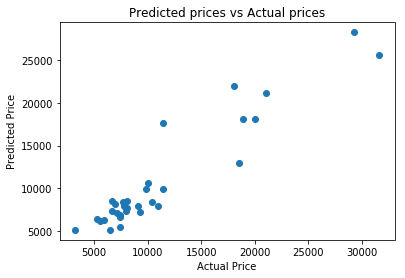

In [157]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.title("Predicted prices vs Actual prices")
plt.show()

In [158]:
torch.save(model, 'my_model')


In [159]:
saved_model = torch.load('my_model')

In [160]:
saved_model

Sequential(
  (0): Linear(in_features=26, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [161]:
y_pred_tensor = saved_model(x_test_tensor)

In [162]:
y_pred = y_pred_tensor.detach().numpy()

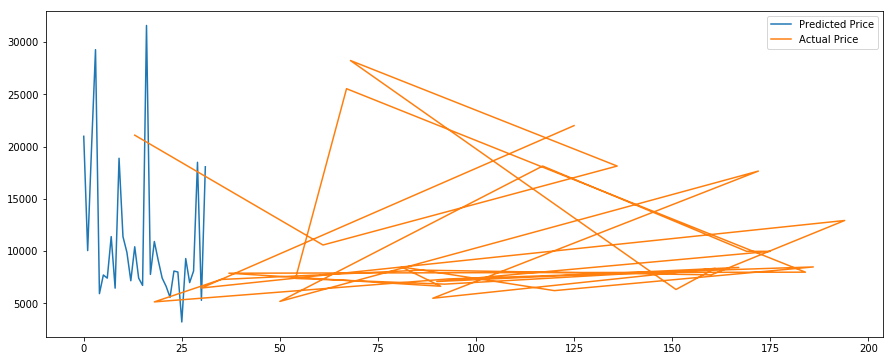

In [163]:
plt.figure(figsize = (15,6))

plt.plot(y_pred, label='Predicted Price')
plt.plot(y_test, label='Actual Price')
plt.legend()
plt.show()